In [4]:
import pandas as pd
import missingno as msno

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import r2_score as r2

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
# import xgboost as xgb
# import lightgbm as lgb

In [6]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [7]:
train=train.drop(columns=['id'])
test=test.drop(columns=['id'])

In [8]:
# msno.bar(test.iloc[:,:])

In [9]:
columns=train.columns

In [10]:
from impyute.imputation.cs import fast_knn
train1=fast_knn(train,k=3)
test = fast_knn(test ,k=3)

/home/dibyakanti/.local/lib/python2.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [11]:
train1.columns=columns

In [12]:
X = train1.iloc[:,3:]  #independent columns
y = train1.iloc[:,2]#target column
X_test=   test.iloc[:,2:]

In [13]:
X['span']=train1.iloc[:,0]

/home/dibyakanti/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
X_test['span']=test.iloc[:,0]

/home/dibyakanti/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
X['span']=X.span.astype(float)

/home/dibyakanti/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
X_test['span']=X_test.span.astype(float)

/home/dibyakanti/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
y_test.dtypes

dtype('float64')

[1.05954421e-04 2.51281065e-07 2.90622223e-03 7.52182633e-05
 4.70136578e-03 8.70062195e-04 6.29719689e-05 5.59706642e-05
 1.95192095e-06 6.47168225e-06 3.04628244e-06 5.20894047e-02
 1.84160236e-04 3.95064168e-05 1.98945743e-01 6.61328093e-04
 8.49422949e-04 3.48177661e-06 1.46998043e-04 1.30222054e-07
 2.64538971e-04 9.29067504e-04 2.30095749e-04 5.18900818e-05
 1.61697989e-04 3.00389407e-04 1.93320300e-06 1.08740909e-03
 4.21604414e-04 3.70101175e-06 9.31313792e-06 2.58205550e-03
 3.95024699e-05 9.91421701e-05 2.43082496e-04 1.25923655e-04
 8.97505799e-10 4.04165091e-04 0.00000000e+00 6.94358254e-04
 1.45311409e-04 1.38672523e-03 2.10006450e-04 3.50892282e-05
 3.70282997e-04 4.68162919e-04 1.31974741e-05 3.00270616e-04
 1.78310111e-04 7.21484077e-04 1.39679403e-04 1.16543405e-04
 1.58087598e-04 1.23067445e-03 2.85630391e-03 3.98347337e-04
 1.76225075e-05 4.89503055e-04 2.02182910e-01 3.18785721e-04
 6.06508039e-05 1.21750170e-04 1.17807780e-04 2.11954990e-04
 9.06811099e-04 3.154686

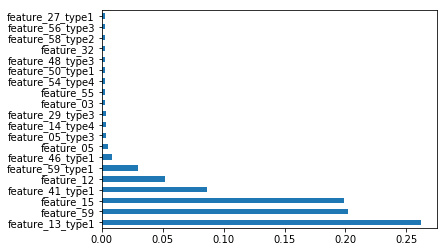

In [137]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [138]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [121]:
X.shape

(155, 300)

In [105]:
y.shape

(155,)

In [140]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X_test=preprocessing.StandardScaler().fit(X_test).transform(X_test)


In [141]:
X_train = X
y_train = y
X_test

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [153]:
from sklearn.ensemble import RandomForestRegressor

rnd = RandomForestRegressor(n_estimators=200, max_depth=120, min_samples_leaf=10)
rnd.fit(X_train, y_train)
yhat=rnd.predict(X_test)

#r2_score(y_train,yhat)